# Post-meiotic mechanism of facultative parthenogenesis in gonochoristic whiptail lizard species

Relative paths to files are still listed here. All intermediate files are available upon request.

4278 is actually S30700.

## Imports

In [1]:
from __future__ import print_function
from __future__ import division
%matplotlib inline
%load_ext ipycache
import matplotlib 
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec
from matplotlib.collections import BrokenBarHCollection
import matplotlib.patches as mpatches
import matplotlib_venn as venn
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch
import os
import sys
from IPython.display import Markdown, display
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import scipy.stats as stats
import itertools
from itertools import izip
import multiprocessing as mp
import numpy as np
import glob
from pprint import pprint
from IPython.display import Image
from IPython.display import display, HTML
from collections import defaultdict
from IPython.display import set_matplotlib_formats
from IPython.display import Image
from matplotlib.ticker import FuncFormatter
import matplotlib
import math
plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Arial"
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
pd.set_option('display.max_colwidth', -1)
display(HTML("<style>.container { width:80% !important; }</style>"))
sys.path = ['../bin'] + sys.path
import gff3_plotting as gff3
import fasta_classes as fa
import blizzard2 as bliz


/home/dut/anaconda3/envs/anaconda2/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated since IPython 4.0. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/home/dut/anaconda3/envs/anaconda2/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


## Naming Colors and Constants

Here I establish some colors and dictionaries to convert sample names back and forth.

In [2]:
colors = ['#543005','#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e','#003c30']
animal_names  = [
    '003',
    '001',
    '122',
    '4278',
    '9721',
    '6993',
    '9177',
    '8450',
    '12512',
    '12513',
]

animal_ids = [
    'Atig003',
    'Atig001',
    'Atig_122',
    'Atig_4278',
    'A.tig_9721',
    'Atig_6993',
    'Atig_9177',
    'A_tigris8450',
    'A.tig_12512',
    'A.tig_12513',
]


og_animal_ids = [
     'Atig003',
    'Atig001',
    'Atig_122',
    'A_tigris8450',
]

family_1 = [
   'Atig_122',
   'A_tigris8450',
]

family_2 = [
    'A.tig_9721',
    'A.tig_12512',
    'A.tig_12513',  
]

parth_animals = [
    'A_tigris8450',
    'A.tig_12512',
    'A.tig_12513',
    'Atig_6993',
    'Atig_9177',
]

#1b9e77
#d95f02
#7570b3
#e7298a
family_colors = {
    'Atig001':'#1b9e77',
    'Atig003':'#1b9e77',
    
    'Atig_122'    :'#d95f02',
    'A_tigris8450':'#7570b3',
    
    'A.tig_9721' :'#d95f02',
    'A.tig_12512':'#7570b3',
    'A.tig_12513':'#e7298a',  
    
    'Atig_4278':'#d95f02',
    'Atig_6993':'#7570b3',
    'Atig_9177':'#e7298a',
}


color_names = dict(zip(animal_names,colors))
color_ids = dict(zip(animal_ids, colors))
id_to_name = dict(zip(animal_ids, animal_names))
name_to_id = dict(zip(animal_names, animal_ids))
majorFontSize = 10
minorFontSize = 9
sns.set(font_scale=1.0, style='whitegrid')

In [3]:
def change_name(name, map_dict=id_to_name):
    name = map_dict[name]
    return name

## Accesory Functions

Here are a few accessory functions that I use later in the analysis. 

In [4]:
def col_name_for_max(row, cols_to_check):
    if row[cols_to_check].max() > 0:
        max_col = row[cols_to_check].argmax()
    else:
        max_col = 'Unclassified'

    return max_col

In [5]:
def apply_df(df, func, *args):
    return df.apply(lambda x: func(x, *args), axis=1)

In [6]:
def apply_df(df, func, *args):
    return df.apply(lambda x: func(x, *args), axis=1)

def apply_by_multiprocessing(df, func, workers, *args):
    pool = mp.Pool(processes=workers)
    result = [pool.apply_async(apply_df, args = (d, func) + args) for d in np.array_split(df, workers)]
    output = [p.get() for p in result]
    pool.close()
    return pd.concat(output)

In [7]:
def round_up_to_even(f):
    return math.ceil(f / 2.) * 2

## All Scaffolds Genome Stats

The following python module is used to manipulate and gather data from a fasta formated sequence file.

In [41]:
# %load ../bin/fasta_classes.py

`lizard_23Jun2015_piz6a.upper.fasta` is the AspMar1.0 genome file available on NCBI.

In [42]:
dovetailGenomeFile2 = '../../dovetail_genome_delivery/data/fastas/lizard_23Jun2015_piz6a.upper.fasta'
dtGenome2 = fa.Fasta_file(dovetailGenomeFile2)
dtGenome2.get_bc_stats()

perc_genome_covered_by_scaffolds_greater_than_1mb 98.4720241117
total bases 1639530780
perc_genome_covered_by_scaffolds_greater_than_100kb 99.4578671466
scaffolds_greater_than_100Mb 0
N90 7979424
scaffolds_greater_than_1Mb 90
median_scaffold 1450
perc_genome_covered_by_scaffolds_greater_than_10kb 99.6264638594
N50 32220929
max_scaffold 85027298
scaffolds_greater_than_10kb 223
mean_scaffold 428523.465761
min_scaffold 927
scaffolds_greater_than_10Mb 45
scaffolds_greater_than_100kb 133
number of scaffolds 3826


In [43]:
statDF2 = pd.DataFrame(dtGenome2.stats,index=['statistic'])
statDF2

,N50,N90,max_scaffold,mean_scaffold,median_scaffold,min_scaffold,number of scaffolds,perc_A,perc_C,perc_G,...,perc_T,perc_genome_covered_by_scaffolds_greater_than_100kb,perc_genome_covered_by_scaffolds_greater_than_10kb,perc_genome_covered_by_scaffolds_greater_than_1mb,scaffolds_greater_than_100Mb,scaffolds_greater_than_100kb,scaffolds_greater_than_10Mb,scaffolds_greater_than_10kb,scaffolds_greater_than_1Mb,total bases
statistic,32220929,7979424,85027298,428523.465761,1450,927,3826,27.039101,20.122447,20.12903,...,27.040218,99.457867,99.626464,98.472024,0,133,45,223,90,1639530780


In [44]:
statDF2['non_n_GC%'] = statDF2[['perc_G','perc_C']].T.sum() / statDF2[['perc_A','perc_G','perc_C','perc_T']].T.sum() * 100.0
statDF2['non_n_AT%'] = statDF2[['perc_A','perc_T']].T.sum() / statDF2[['perc_A','perc_G','perc_C','perc_T']].T.sum() * 100.0

statDF2 = statDF2.T
statDF2['statistic'] = statDF2['statistic'].apply(lambda x: '%.5f' % x)
statDF2

,statistic
N50,32220929.00000
N90,7979424.00000
max_scaffold,85027298.00000
mean_scaffold,428523.46576
median_scaffold,1450.00000
min_scaffold,927.00000
number of scaffolds,3826.00000
perc_A,27.03910
perc_C,20.12245
perc_G,20.12903


In [45]:
statDF2 = statDF2.reset_index()
statDF2.columns = ['statistic', 'value']

In [46]:
statDF2

,statistic,value
0,N50,32220929.00000
1,N90,7979424.00000
2,max_scaffold,85027298.00000
3,mean_scaffold,428523.46576
4,median_scaffold,1450.00000
5,min_scaffold,927.00000
6,number of scaffolds,3826.00000
7,perc_A,27.03910
8,perc_C,20.12245
9,perc_G,20.12903


In [47]:
statDF2.to_csv('../data/supplemental_data/supplemental_table_5.csv',index=False)

## Large Scaffold Genome Stats

Here I load in the fasta file containing all scaffolds in the genome greater than 10kb using the fasta_classes.py module shown above. I use this module to gather basic statistics about the genome

In [48]:
dovetailGenomeFile = '../data/gatk6/reference/tigris_scaffolds_filt_10000.fa'
dtGenome = fa.Fasta_file(dovetailGenomeFile)
dtGenome.get_bc_stats()

perc_genome_covered_by_scaffolds_greater_than_1mb 98.8412318344
total bases 1633406540
perc_genome_covered_by_scaffolds_greater_than_100kb 99.8307711563
scaffolds_greater_than_100Mb 0
N90 8340160
scaffolds_greater_than_1Mb 90
median_scaffold 296338
perc_genome_covered_by_scaffolds_greater_than_10kb 100.0
N50 32220929
max_scaffold 85027298
scaffolds_greater_than_10kb 223
mean_scaffold 7324693.00448
min_scaffold 10129
scaffolds_greater_than_10Mb 45
scaffolds_greater_than_100kb 133
number of scaffolds 223


In [49]:
statDF = pd.DataFrame(dtGenome.stats,index=['statistic'])
statDF

,N50,N90,max_scaffold,mean_scaffold,median_scaffold,min_scaffold,number of scaffolds,perc_A,perc_C,perc_G,...,perc_T,perc_genome_covered_by_scaffolds_greater_than_100kb,perc_genome_covered_by_scaffolds_greater_than_10kb,perc_genome_covered_by_scaffolds_greater_than_1mb,scaffolds_greater_than_100Mb,scaffolds_greater_than_100kb,scaffolds_greater_than_10Mb,scaffolds_greater_than_10kb,scaffolds_greater_than_1Mb,total bases
statistic,32220929,8340160,85027298,7.324693e+06,296338,10129,223,27.049532,20.123188,20.129348,...,27.050599,99.830771,100.0,98.841232,0,133,45,223,90,1633406540


Here I show the basic statistics gathered by the fasta class

In [50]:
statDF['non_n_GC%'] = statDF[['perc_G','perc_C']].T.sum() / statDF[['perc_A','perc_G','perc_C','perc_T']].T.sum() * 100.0
statDF['non_n_AT%'] = statDF[['perc_A','perc_T']].T.sum() / statDF[['perc_A','perc_G','perc_C','perc_T']].T.sum() * 100.0

statDF = statDF.T
statDF['statistic'] = statDF['statistic'].apply(lambda x: '%.5f' % x)
statDF

,statistic
N50,32220929.00000
N90,8340160.00000
max_scaffold,85027298.00000
mean_scaffold,7324693.00448
median_scaffold,296338.00000
min_scaffold,10129.00000
number of scaffolds,223.00000
perc_A,27.04953
perc_C,20.12319
perc_G,20.12935


In [51]:
statDF = statDF.reset_index()

In [52]:
statDF.columns = ['statistic', 'value']

In [53]:
statDF

,statistic,value
0,N50,32220929.00000
1,N90,8340160.00000
2,max_scaffold,85027298.00000
3,mean_scaffold,7324693.00448
4,median_scaffold,296338.00000
5,min_scaffold,10129.00000
6,number of scaffolds,223.00000
7,perc_A,27.04953
8,perc_C,20.12319
9,perc_G,20.12935


In [54]:
#statDF.to_csv('../data/supplemental_data/supplemental_table_5.csv',index=False)

Next, I use the module to calculate N50 like scores. I then plot those scores in the next figure.

In [55]:
nxDF = pd.DataFrame(dtGenome.return_nx_dist()).T
nxDF.columns=['perc','size']
nxDF = nxDF.sort_values('perc')

## Genome assembly assessment (Figure S2B)

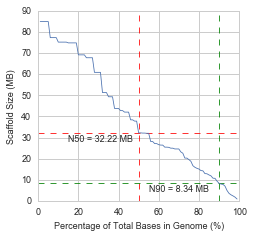

In [56]:
ax1 = nxDF.plot('perc','size', fontsize=minorFontSize, legend=False, linewidth=0.8, figsize=(3.6,3.4))

ax1.get_yaxis().get_major_formatter().set_scientific(False)
ax1.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x/1000000), ',')))
ax1.set_ylabel('Scaffold Size (MB)',fontsize=minorFontSize)


ax1.set_xlabel('Percentage of Total Bases in Genome (%)',fontsize=minorFontSize)
ax1.set_xticks(np.arange(0,120,20))

ax1.vlines(x=50,color ='r',ymin=0,ymax=100000000,linestyle='--', linewidth=0.8)
ax1.hlines(y=32220929,color ='r',xmin=0,xmax=100,linestyle='--', linewidth=0.8)
ax1.annotate('N50 = 32.22 MB',xy=(15,28000000),fontsize=minorFontSize)

ax1.vlines(x=90,color ='g',ymin=0,ymax=100000000,linestyle='--', linewidth=0.8)
ax1.hlines(y=8340160,color ='g',xmin=0,xmax=100,linestyle='--', linewidth=0.8)
ax1.annotate('N90 = 8.34 MB',xy=(55,4500000),fontsize = minorFontSize)

ax1.set_ylim(0,90000000)


ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

fig = ax1.get_figure()
#fig.savefig('../fig2/Figure3A.pdf', bbox_inches='tight')


Here I load in the sizes of each scaffold in the genome. These are used multiple times later in analysis.

In [57]:
scaffoldSizes = pd.read_csv('/n/projects/dut/a_marmorata/dovetail_genome_delivery/data/fastas/scaffold_sizes.clean.tsv',sep='\t',names=['scaffold','scaffold_size'])
scaffoldSizes = scaffoldSizes.sort_values('scaffold_size',ascending=False)
orderedScaffolds = scaffoldSizes.scaffold.tolist()
scaffoldSizeDict = dict(zip(scaffoldSizes.scaffold,scaffoldSizes.scaffold_size))

## Load Annotations

For the purposes of the manuscript, we are only considering the MAKER2 annotations.

The following python module can be used to manipulate and plot the contained in a GFF3 formatted file.

In [74]:
# %load ../bin/gff3_plotting.py

Here I load in the genome annotations, these are used later in the hox gene analysis and vmnr analysis.

In [75]:
gffMarmAbInPath='../data/augustus.renamed.putative_function.iprscan.gff3'
gffMarmPath = '../data/a_tigris_1.renamed.putative_function.iprscan.wintrons.gff'
gffMarmDF= gff3.gff3_to_attribute_df(gff_path=gffMarmPath,ensembl=False)
gffMarmDF = gff3.add_gene_symbol(gffMarmDF, ensembl=False)
gffMarmDF = gff3.add_gene_id(gffMarmDF, ensembl=False)
gffMarmDF = gff3.add_gene_name(gffMarmDF, ensembl=False)
gffMarmDF['count_column'] = gffMarmDF.apply(lambda row: (row['seqid'], row['gene_symbol']), axis=1)
gffMarmDF['source'] = 'MAKER2'

691299 691299


In [76]:
gffMarmAbInDF= gff3.gff3_to_attribute_df(gff_path=gffMarmAbInPath,ensembl=False)
gffMarmAbInDF = gff3.add_gene_symbol(gffMarmAbInDF, ensembl=False)
gffMarmAbInDF = gff3.add_gene_id(gffMarmAbInDF, ensembl=False)
gffMarmAbInDF = gff3.add_gene_name(gffMarmAbInDF, ensembl=False)
gffMarmAbInDF['count_column'] = gffMarmAbInDF.apply(lambda row: (row['seqid'], row['gene_symbol']), axis=1)
gffMarmAbInDF['source']='BRAKER1'

1737575 1737575


In [77]:
supplementalAnnotDF = pd.concat(
    [
        gffMarmAbInDF[['source','feature']], 
        gffMarmDF[['source','feature']]
    ]
     )
supplementalAnnotDF['count'] =1

In [78]:
supplementalAnnotDF = supplementalAnnotDF.groupby(['source','feature']).sum().reset_index()
supplementalAnnotDF

,source,feature,count
0,BRAKER1,CDS,424058
1,BRAKER1,exon,424058
2,BRAKER1,gene,152361
3,BRAKER1,intron,267602
4,BRAKER1,mRNA,156525
5,BRAKER1,start_codon,156457
6,BRAKER1,stop_codon,156514
7,MAKER2,CDS,222450
8,MAKER2,exon,164669
9,MAKER2,five_prime_UTR,22402


In [79]:
supplementalAnnotDF = supplementalAnnotDF.T

In [80]:
supplementalAnnotDF = supplementalAnnotDF.reset_index()
supplementalAnnotDF = supplementalAnnotDF.rename(columns=supplementalAnnotDF.iloc[1])
supplementalAnnotDF = supplementalAnnotDF.reindex(supplementalAnnotDF.index.drop(1))

In [81]:
supplementalAnnotDF

,feature,CDS,exon,gene,intron,mRNA,start_codon,stop_codon,CDS,exon,five_prime_UTR,gene,intron,mRNA,three_prime_UTR
0,source,BRAKER1,BRAKER1,BRAKER1,BRAKER1,BRAKER1,BRAKER1,BRAKER1,MAKER2,MAKER2,MAKER2,MAKER2,MAKER2,MAKER2,MAKER2
2,count,424058,424058,152361,267602,156525,156457,156514,222450,164669,22402,25856,189732,44461,21729


In [82]:
#supplementalAnnotDF.T.to_csv('../data/supplemental_data/supplemental_table_7.csv',index=True,header='False')

## HOX Gene Analysis (Figure S5)

Here I link to the braker ab initio gene predictions

In [83]:
%%bash
cd ../data
#ln -s ../../dovetail_braker_annotation/data/augustus.renamed.putative_function.iprscan.gff3

Next, I downloaded annotation sets for human, mouse, and anolis. I was originally going to compare annotations directly in the GFF file, but I decided not too because the annotations for mouse and human have far more evidence than the annotations for anolis.

In [84]:
%%bash
cd ../data
#wget ftp://ftp.ensembl.org/pub/release-87/gff3/homo_sapiens/Homo_sapiens.GRCh38.87.abinitio.gff3.gz
#wget ftp://ftp.ensembl.org/pub/release-87/gff3/homo_sapiens/Homo_sapiens.GRCh38.87.chr.gff3.gz
#gunzip Homo_sapiens.GRCh38.87.abinitio.gff3.gz
#gunzip Homo_sapiens.GRCh38.87.chr.gff3.gz


In [85]:
%%bash
cd ../data
#wget ftp://ftp.ensembl.org/pub/release-87/gff3/mus_musculus/Mus_musculus.GRCm38.87.chr.gff3.gz
#wget ftp://ftp.ensembl.org/pub/release-87/gff3/mus_musculus/Mus_musculus.GRCm38.87.abinitio.gff3.gz
#gunzip Mus_musculus.GRCm38.87.chr.gff3.gz
#gunzip Mus_musculus.GRCm38.87.abinitio.gff3.gz

In [86]:
%%bash
cd ../data
#wget ftp://ftp.ensembl.org/pub/release-87/gff3/anolis_carolinensis/Anolis_carolinensis.AnoCar2.0.87.chr.gff3.gz
#wget ftp://ftp.ensembl.org/pub/release-87/gff3/anolis_carolinensis/Anolis_carolinensis.AnoCar2.0.87.abinitio.gff3.gz
#gunzip Anolis_carolinensis.AnoCar2.0.87.chr.gff3.gz
#gunzip Anolis_carolinensis.AnoCar2.0.87.abinitio.gff3.gz

In [87]:
%%bash
cd ../data
#wget ftp://ftp.ensembl.org/pub/release-87/gff3/anolis_carolinensis/Anolis_carolinensis.AnoCar2.0.87.gff3.gz
#gunzip Anolis_carolinensis.AnoCar2.0.87.gff3.gz

Here I am searching for the HOX gene clusters and plotting them using the python script loaded into this notebook (gff3).

1737575 1737575
1737575
165


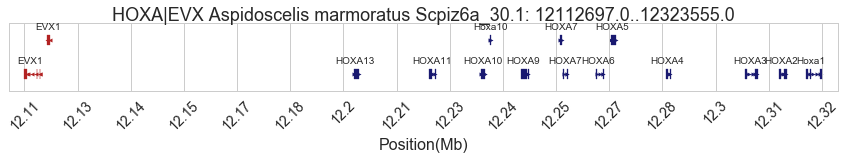

1737575 1737575
1737575
171


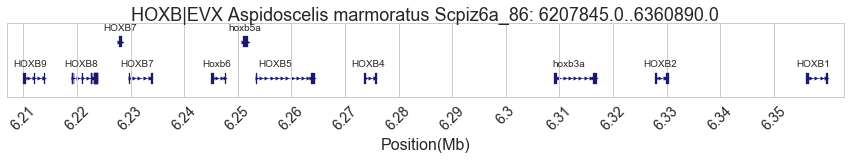

1737575 1737575
1737575
168


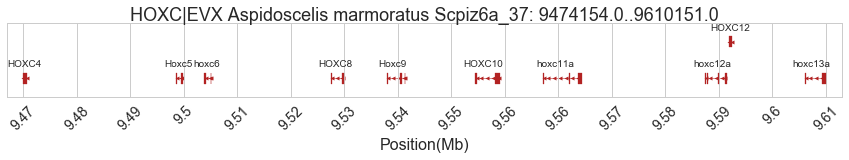

1737575 1737575
1737575
200


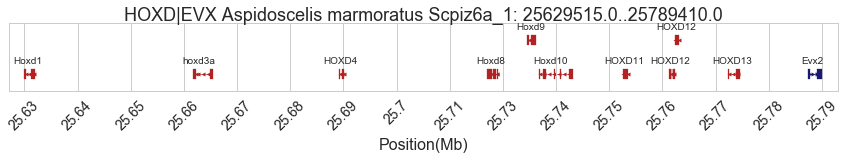

In [88]:
for c in ['a','b','c','d']:
    #Aspidoscelis marmorata
    regex = 'hox%s|evx'%c
    organism = 'Aspidoscelis marmoratus'
    fig, ax = gff3.plot_single_cluster_series(gff3_paths=['../data/augustus.renamed.putative_function.iprscan.gff3'], subset_regex=regex, species=organism, path_targ='augustus')
    #fig.savefig('../fig/%s_hox-%s.pdf'%(organism, c), bbox_inches='tight', pad_inches=0.2)
    plt.show()

Here I subset out the scaffolds which contain the hox gene clusters. This was done in case they were needed for supplemental. I also extracted out the annotations for just those scaffolds from the GFF3 braker gene predictions.

In [89]:
hoxScaffolds = ['>Scpiz6a_1','>Scpiz6a_37','>Scpiz6a_86','>Scpiz6a_30.1']
hoxGenomeDict = {k:v for k,v in dtGenome.fasta_dict.items() if k in hoxScaffolds}
fa.write_two_line_fasta('../data/hox_scaffolds.fa', list(hoxGenomeDict.items()))

In [90]:
augHoxGFFDF = pd.read_csv('../data/augustus.renamed.putative_function.iprscan.gff3',sep='\t',header=None)
augHoxGFFDF = augHoxGFFDF[augHoxGFFDF[0].isin([s.strip('>') for s in hoxScaffolds])]
augHoxGFFDF.to_csv('../data/aug_hox_annotations.gff3',sep='\t')
augHoxGFFDF.head()


,0,1,2,3,4,5,6,7,8
348850,Scpiz6a_37,AUGUSTUS,gene,3902,4216,0.59,+,.,ID=ATIG_ab_00023958;Name=;Alias=g31007;Note=Similar to NSMF: NMDA receptor synaptonuclear signaling and neuronal migration factor (Homo sapiens);
348851,Scpiz6a_37,AUGUSTUS,mRNA,3902,4216,0.59,+,.,ID=ATIG_ab_00023958-RA;Parent=ATIG_ab_00023958;Name=;Alias=g31007.t1;Note=Similar to NSMF: NMDA receptor synaptonuclear signaling and neuronal migration factor (Homo sapiens);
348852,Scpiz6a_37,AUGUSTUS,start_codon,3902,3904,.,+,0,Parent=ATIG_ab_00023958-RA;
348853,Scpiz6a_37,AUGUSTUS,CDS,3902,4216,0.59,+,0,ID=g31007.t1.CDS1;Parent=ATIG_ab_00023958-RA;
348854,Scpiz6a_37,AUGUSTUS,exon,3902,4216,.,+,.,ID=g31007.t1.exon1;Parent=ATIG_ab_00023958-RA;


Because the above figures are a bit messy looking I decided to make a simple schematic for the text. I start with pulling out all the gene coordinates for the above figures.

In [91]:
%%bash
cd ../data
#awk '$3=="gene"' augustus.renamed.putative_function.iprscan.gff3 | grep -E -i ' hox|evx' | awk  '$1=="Scpiz6a_86" || $1=="Scpiz6a_30.1" || $1=="Scpiz6a_37" || $1=="Scpiz6a_1"' | sed 's/Similar to /\t/' | cut -f -5,7,10 | tr ':' '\t' | cut -f -7 > hox_gene_coords.tsv

I also independently found HOXB13 in the MAKER annotations by manually blasting a nearby model. I next added the coordinates from that model to the file I generated above.

In [92]:
%%bash
cd ../data
#grep ATIG_00008349 a_tigris_1.renamed.putative_function.iprscan.wintrons.gff  | awk '$3=="gene"' | cut -f -5,7 | tr '\n' '~' | sed "s/~/@Hoxb13~/" | tr '~' '\n' | tr '@' '\t' >> hox_gene_coords.tsv

I found later on that hoxc3 is present in the anolis lizard (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2665779/). I couldn't find a copy of the sequence mentioned in the paper, but I was able to find a sequence for Xenopus HOXC3. I generated the following curl command directly from the ensemble website.

In [93]:
%%bash
cd ../data
#curl --header 'Host: www.ensembl.org' \
#--header 'User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.11; rv:52.0) Gecko/20100101 Firefox/52.0' \
#--header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8' \
#--header 'Accept-Language: en-US,en;q=0.5' \
#--header 'Referer: http://www.ensembl.org/Xenopus_tropicalis/Gene/Sequence?db=core;g=ENSXETG00000025181;r=GL172862.1:552422-558412;t=ENSXETT00000053914' \
#--header 'Cookie: _ga=GA1.2.780793432.1475001731; ENSEMBL_WIDTH=2300; DYNAMIC_WIDTH=1; _pk_ref..c10e=%5B%22%22%2C%22%22%2C1481326908%2C%22http%3A%2F%2Fuseast.ensembl.org%2FAnolis_carolinensis%2FInfo%2FIndex%22%5D; _pk_id..c10e=6f2a23a1cab0d268.1481326908.1.1481327562.1481326908.; ENSEMBL_HINX_SESSION=0ea132a2ddae24e00aa90673589a5dc90ab37997b5a94c19eec2634e; ENSEMBL_GENOVERSE_SCROLL=0; _gid=GA1.2.2055248845.1494971795; ENSEMBL_REGION_PAN=1; ENSEMBL_SEARCH=ensembl_all; _gali=KDbFOwdW_3; _gat=1' \
#--header 'DNT: 1' \
#--header 'Connection: keep-alive' \
#--header 'Upgrade-Insecure-Requests: 1' 'http://www.ensembl.org/Xenopus_tropicalis/Download/DataExport?compression=;db=core;file=temporary/2017_05_16/session_295535549/HAUljTwe/Xenopus_tropicalis_hoxc3_sequence.fa;filename=Xenopus_tropicalis_hoxc3_sequence.fa;format=FASTA;g=ENSXETG00000025181;r=GL172862.1:552422-558412;t=ENSXETT00000053914' \
#-o 'Xenopus_tropicalis_hoxc3_sequence.fa' \
#-L
cat ../data/Xenopus_tropicalis_hoxc3_sequence.fa

>hoxc3-201 peptide: ENSXETP00000053914 pep:KNOWN_protein_coding
MPKSLFYDNSASFGGCGFQGNNGMGYLGQQDYPSEDDYQPPFCLPPDTANGSASHKGEHS
IKGIDFHLSEVSEQAQQPKSPNSDSPLPKSASTQSCTSKKSTGPVSSDVTSPNKKSKGSN
MPKQIFPWMKETRQNSKQKKQAPPPAEEACKVREKNTGSFSASKRARTAYTNSQLVELEK
EFHFNRYLCRPRRLEMAKLLNLSERQIKIWFQNRRMKFKKDHKGKGGGGSPGGLSPSSSP
SLMPYSGNLPLDGDCGYEVPMATGAYNKSPGNMYGLTAYSAPLFEGPSAQKRYGPQSLAP
EYDPHSMQGDNNYDTSGLPNGQGYLGNYLENGSESCSMFSLPHPSSESMDYSCAAQTPSK
HHLGPCDPHPTYTDLHIHPVPQACSQEPPVLTHL



In [94]:
%%bash
#exonerate --model protein2genome \
#--showvulgar no \
#--showalignment no \
#--showtargetgff yes \
#--maxintron 50000 \
#--ryo ">%qi length=%ql alnlen=%qaln>%ti length=%tl alnlen=%taln" \
#--query ../data/Xenopus_tropicalis_hoxc3_sequence.fa \
#--target ../data/tigris_scaffolds_filt_10000.fa \
#> Xenopus_tropicalis_hoxc3_to_marmoratus_genome.out &
#mv Xenopus_tropicalis_hoxc3_to_marmoratus_genome.out ../data


In [95]:
%%bash
cd ../data
#grep -v '^#' Xenopus_tropicalis_hoxc3_to_marmoratus_genome.out | grep -v '^>' | grep -v 'bonsai.sgc.loc' | grep -v '^Command line:' > Xenopus_tropicalis_hoxc3_to_marmoratus_genome.gff

In [96]:
xenopusHoxcHits = pd.read_csv('../data/Xenopus_tropicalis_hoxc3_to_marmoratus_genome.gff',sep='\t', names=['seqid', 'source', 'feature', 'start', 'end', 'score', 'strand', 'phase', 'attributes'])
xenopusHoxcHits.head()

,seqid,source,feature,start,end,score,strand,phase,attributes
0,Scpiz6a_49,exonerate:protein2genome:local,gene,19691975,19692514,198,+,.,gene_id 1 ; sequence hoxc3-201 ; gene_orientation + ; identity 35.40 ; similarity 50.31
1,Scpiz6a_49,exonerate:protein2genome:local,cds,19691975,19692248,.,+,.,NaN
2,Scpiz6a_49,exonerate:protein2genome:local,exon,19691975,19692248,.,+,.,insertions 0 ; deletions 0 ; identity 43.96 ; similarity 57.14
3,Scpiz6a_49,exonerate:protein2genome:local,splice5,19692249,19692250,.,+,.,"intron_id 1 ; splice_site ""TC"""
4,Scpiz6a_49,exonerate:protein2genome:local,intron,19692249,19692302,.,+,.,intron_id 1


The second best hit appears in the right area.

In [97]:
xenopusHoxcHits[(xenopusHoxcHits.feature == 'gene') &(xenopusHoxcHits.seqid == 'Scpiz6a_37')].sort_values('score',ascending=False).head()


,seqid,source,feature,start,end,score,strand,phase,attributes
391,Scpiz6a_37,exonerate:protein2genome:local,gene,9403550,9404943,346,-,.,gene_id 1 ; sequence hoxc3-201 ; gene_orientation + ; identity 60.80 ; similarity 72.00
400,Scpiz6a_37,exonerate:protein2genome:local,gene,9473492,9474480,243,-,.,gene_id 2 ; sequence hoxc3-201 ; gene_orientation + ; identity 40.85 ; similarity 56.34
409,Scpiz6a_37,exonerate:protein2genome:local,gene,9500001,9500189,228,-,.,gene_id 3 ; sequence hoxc3-201 ; gene_orientation . ; identity 71.43 ; similarity 82.54
413,Scpiz6a_37,exonerate:protein2genome:local,gene,9504971,9505144,205,-,.,gene_id 4 ; sequence hoxc3-201 ; gene_orientation . ; identity 67.24 ; similarity 81.03
417,Scpiz6a_37,exonerate:protein2genome:local,gene,9535775,9535966,203,-,.,gene_id 5 ; sequence hoxc3-201 ; gene_orientation . ; identity 60.94 ; similarity 78.12


In [98]:
%%bash
cd ../data
#cat Xenopus_tropicalis_hoxc3_to_marmoratus_genome.gff | awk '$1=="Scpiz6a_37" && $4==9403550 && $3=="gene"' | cut -f -5,7 | tr '\n' '~' | sed "s/~/@Hoxc3~/" | tr '~' '\n' | tr '@' '\t' >> hox_gene_coords.tsv

In [99]:
hoxExonCoords = pd.read_csv('../data/hox_gene_coords.tsv', sep='\t', names=['seqid','source','type','start','stop','strand','name'])
hoxExonCoords

,seqid,source,type,start,stop,strand,name
0,Scpiz6a_37,AUGUSTUS,gene,9282120,9288133,-,hoxa1
1,Scpiz6a_37,AUGUSTUS,gene,9474154,9474759,-,HOXC4
2,Scpiz6a_37,AUGUSTUS,gene,9499983,9501230,-,Hoxc5
3,Scpiz6a_37,AUGUSTUS,gene,9504857,9506031,-,hoxc6
4,Scpiz6a_37,AUGUSTUS,gene,9526250,9528579,-,HOXC8
5,Scpiz6a_37,AUGUSTUS,gene,9535748,9538860,-,Hoxc9
6,Scpiz6a_37,AUGUSTUS,gene,9550771,9554871,-,HOXC10
7,Scpiz6a_37,AUGUSTUS,gene,9562146,9568818,-,hoxc11a
8,Scpiz6a_37,AUGUSTUS,gene,9589583,9593356,-,hoxc12a
9,Scpiz6a_37,AUGUSTUS,gene,9593673,9594302,-,HOXC12


Here I drop annotations that I accidentally picked up a

In [100]:
hoxExonCoords = hoxExonCoords[~hoxExonCoords.name.isin(['hoxU','hoxM','HOX3'])]
hoxExonCoords['factor_name'] = hoxExonCoords.name.apply(lambda x: x.upper()[:-1] if x[-1] not in [str(s) for s in range(20)] else x.upper())
hoxExonCoords = hoxExonCoords.sort_values(['seqid', 'start']).reset_index(drop=True)
hoxExonCoords

/home/dut/anaconda3/envs/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,seqid,source,type,start,stop,strand,name,factor_name
0,Scpiz6a_1,AUGUSTUS,gene,25629515,25631702,-,Hoxd1,HOXD1
1,Scpiz6a_1,AUGUSTUS,gene,25663228,25667221,-,hoxd3a,HOXD3
2,Scpiz6a_1,AUGUSTUS,gene,25692499,25693667,-,HOXD4,HOXD4
3,Scpiz6a_1,AUGUSTUS,gene,25722293,25724423,-,Hoxd8,HOXD8
4,Scpiz6a_1,AUGUSTUS,gene,25730347,25732122,-,Hoxd9,HOXD9
5,Scpiz6a_1,AUGUSTUS,gene,25732652,25739472,-,Hoxd10,HOXD10
6,Scpiz6a_1,AUGUSTUS,gene,25749545,25750504,-,HOXD11,HOXD11
7,Scpiz6a_1,AUGUSTUS,gene,25758704,25759860,-,HOXD12,HOXD12
8,Scpiz6a_1,AUGUSTUS,gene,25760003,25760716,-,HOXD12,HOXD12
9,Scpiz6a_1,AUGUSTUS,gene,25770564,25772996,-,HOXD13,HOXD13


There are still certain HOX gene homologies present on scaffolds outside of the clusters.

In [101]:
hoxExonCoords = hoxExonCoords.drop(hoxExonCoords.index[[38,26]])
hoxExonCoords

,seqid,source,type,start,stop,strand,name,factor_name
0,Scpiz6a_1,AUGUSTUS,gene,25629515,25631702,-,Hoxd1,HOXD1
1,Scpiz6a_1,AUGUSTUS,gene,25663228,25667221,-,hoxd3a,HOXD3
2,Scpiz6a_1,AUGUSTUS,gene,25692499,25693667,-,HOXD4,HOXD4
3,Scpiz6a_1,AUGUSTUS,gene,25722293,25724423,-,Hoxd8,HOXD8
4,Scpiz6a_1,AUGUSTUS,gene,25730347,25732122,-,Hoxd9,HOXD9
5,Scpiz6a_1,AUGUSTUS,gene,25732652,25739472,-,Hoxd10,HOXD10
6,Scpiz6a_1,AUGUSTUS,gene,25749545,25750504,-,HOXD11,HOXD11
7,Scpiz6a_1,AUGUSTUS,gene,25758704,25759860,-,HOXD12,HOXD12
8,Scpiz6a_1,AUGUSTUS,gene,25760003,25760716,-,HOXD12,HOXD12
9,Scpiz6a_1,AUGUSTUS,gene,25770564,25772996,-,HOXD13,HOXD13


Next I collapse all of the coordinates for similar gene models into a single range of evidence for each HOX gene.

In [102]:
collapsedCoordsList = []
for hox_factor in hoxExonCoords.factor_name.unique():
    hox_df = hoxExonCoords[hoxExonCoords.factor_name == hox_factor]
    start = hox_df.start.min()
    stop = hox_df.stop.max()
    data_dict = {'seqid':hox_df.seqid.unique()[0], 'gene':hox_factor, 'start':start, 'stop':stop, 'strand':hox_df.strand.unique()[0]}
    collapsedCoordsList.append(data_dict)
    
hoxGeneCoordsDF = pd.DataFrame(collapsedCoordsList)
hoxGeneCoordsDF

,gene,seqid,start,stop,strand
0,HOXD1,Scpiz6a_1,25629515,25631702,-
1,HOXD3,Scpiz6a_1,25663228,25667221,-
2,HOXD4,Scpiz6a_1,25692499,25693667,-
3,HOXD8,Scpiz6a_1,25722293,25724423,-
4,HOXD9,Scpiz6a_1,25730347,25732122,-
5,HOXD10,Scpiz6a_1,25732652,25739472,-
6,HOXD11,Scpiz6a_1,25749545,25750504,-
7,HOXD12,Scpiz6a_1,25758704,25760716,-
8,HOXD13,Scpiz6a_1,25770564,25772996,-
9,EVX2,Scpiz6a_1,25786550,25789410,+


I then need to normalize each interval so that they start at 0.

In [103]:
for scaffold in hoxGeneCoordsDF.seqid.unique():
    min_start = hoxGeneCoordsDF[hoxGeneCoordsDF.seqid == scaffold].start.min()
    hoxGeneCoordsDF.loc[hoxGeneCoordsDF.seqid == scaffold, 'start'] = hoxGeneCoordsDF[hoxGeneCoordsDF.seqid == scaffold].start - min_start
    hoxGeneCoordsDF.loc[hoxGeneCoordsDF.seqid == scaffold, 'stop'] = hoxGeneCoordsDF[hoxGeneCoordsDF.seqid == scaffold].stop - min_start
hoxGeneCoordsDF

,gene,seqid,start,stop,strand
0,HOXD1,Scpiz6a_1,0,2187,-
1,HOXD3,Scpiz6a_1,33713,37706,-
2,HOXD4,Scpiz6a_1,62984,64152,-
3,HOXD8,Scpiz6a_1,92778,94908,-
4,HOXD9,Scpiz6a_1,100832,102607,-
5,HOXD10,Scpiz6a_1,103137,109957,-
6,HOXD11,Scpiz6a_1,120030,120989,-
7,HOXD12,Scpiz6a_1,129189,131201,-
8,HOXD13,Scpiz6a_1,141049,143481,-
9,EVX2,Scpiz6a_1,157035,159895,+


In [104]:
def coord_to_square(coord, level, color, width):
    start = coord[0]
    end = coord[1]
    polygon = PolygonPatch(
        Polygon(
            [(start, level - width),
             (start, level + width),
             (end, level + width),
             (end, level - width)]
        ), color=color
    )
    return polygon

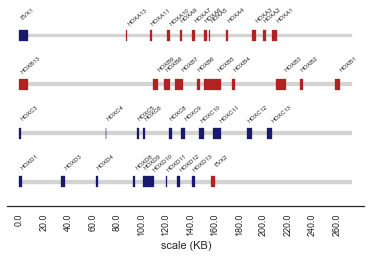

In [105]:
x_buffer = 10000
num_clusters = len(hoxGeneCoordsDF.seqid.unique())


sns.set(font_scale=1.0, style='white')
fig=plt.figure(figsize=(6.4,3.5))
fig.subplots_adjust(hspace=0,wspace=0)
gs = gridspec.GridSpec(num_clusters, 1)
base_cluster_length = hoxGeneCoordsDF.stop.max() + x_buffer
for i,scaffold in enumerate(['Scpiz6a_30.1','Scpiz6a_86','Scpiz6a_37','Scpiz6a_1']):
    ax = plt.subplot(gs[i, :])
    ax.set_ylim(0,4)
    #base_cluster_length = hoxGeneCoordsDF[hoxGeneCoordsDF.seqid == scaffold].stop.max() + x_buffer
    ax.set_xlim(-x_buffer, base_cluster_length + x_buffer)
    cluster_patch = coord_to_square(coord = (0,base_cluster_length), level = 2, color='lightgrey', width=0.15)
    ax.add_patch(cluster_patch)
    counter = 0 
    for i, row in hoxGeneCoordsDF[hoxGeneCoordsDF.seqid == scaffold].iterrows():
        if row['strand'] == '+':
            color = 'firebrick'
        else:
            color = 'midnightblue'
        evidence_square = coord_to_square(coord = (row['start'], row['stop']), level=2, color=color, width=0.45)
        ax.add_patch(evidence_square)
        if counter % 2 == 0:
            text_div = 15.0
        else:
            text_div = 1.3
        
        ax.annotate(row['gene'], xy=(row['start'] + ((row['stop'] - row['start']) / text_div),
                                   4.0), ha='left', fontsize=6, rotation=40)
        counter+=1 
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_yticks([])
    xticks = ax.get_xticks()
    ax.set_xticks([])
ax.spines['bottom'].set_visible(True)
ax.set_xticks(np.arange(0,280000,20000))
x1kb_labels = [str(x/1000) for x in ax.get_xticks()]
ax.set_xticklabels(x1kb_labels,fontsize=minorFontSize,rotation=90)
ax.set_xlabel("scale (KB)")
fig.savefig('../fig2/SupplementalFigure3.pdf',bbox_inches='tight',pad_inches=0.1)

In [106]:
hoxGeneCoordsDF.seqid.unique()
['Scpiz6a_30.1','Scpiz6a_86','Scpiz6a_37','Scpiz6a_1']

['Scpiz6a_30.1', 'Scpiz6a_86', 'Scpiz6a_37', 'Scpiz6a_1']

## Phylogenetic analysis with BUSCO (Figure S3)

| Common_name | Scientific_name | Assembly |
|---|---|---|
| Carolina anole | Anolis carolinensis | anoCar2 |
| Marbled whiptail | Aspidoscelis marmoratus |  |
| Cow | Bos taurus | ARS-UCD1.2 |
| Dog | Canis lupus familiaris | CanFam3.1 |
| Zebrafish | Danio rerio | danRer10 |
| Chicken | Gallus gallus | galGal5 |
| Human | Homo sapiens | GRCh38.p13 |
| Mouse | Mus musculus | GRCm38.p6 |
| Japanese rice fish | Oryzias latipes | oryLat2 |
| Rat | Rattus norvegicus | Rnor_6.0 |
| Argentine black and white tegu | Salvator merianae | HLtupMer3 |
| Tropical clawed frog | Xenopus tropicalis | Xenopus_tropicalis_v9.1 |
| Platyfish | Xiphophorus maculatus | X_maculatus-5.0-male |


```
BUSCO 3.0.1
General command:
python run_BUSCO.py -i GENOME.fasta -o OUTPUT_NAME -l /vertebrata_odb9/ -m genome -c 1
All genomes were searched with the vertebrata_odb9 dataset https://busco.ezlab.org/datasets/verte
brata_odb9.tar.gz
The dataset contains n:2586 orthologs
```

What are the complete orthologs?
Get the names of the complete orthologs from all of the directories of the different genomes:
Sort and count the number of unique orthologs that are complete:
```
for file in $(find . -name "full_table_*.tsv"); do
grep -v "^#" ${file} | awk '$2=="Complete" {print $1}' >> complete_busco_ids.txt;
done
sort complete_busco_ids.txt | uniq -c > complete_busco_ids_with_counts.txt
```

What complete orthologs are shared?

Because we have 13 genomes we are comparing, we need to filter and keep only orthologs that are present in all genomes:

```
mkdir busco_summaries
for file in $(find . -type f -name "short_summary_*"); do
cp $file ./busco_summaries/;
done
generate_plot -wd busco_summaries

wc -l complete_busco_ids_in_all_samples.txt
1333 complete_busco_ids_in_all_samples.txt
```

Shared, complete orthologs between all 13 species: 1333

Go into each `/single_copy_busco_sequence` directory of each BUSCO run and do the dollowing: Add the name of the organism for that ortholog to the fasta record ID and copy that fasta file into our /busco_aa directory.

Combine the fasta sequences for each ortholog
Now that we have all of the amino acid fasta for each ortholog for each genome in one directory, we will query the `complete_busco_ids_in_all_samples.txt` file and combine together orthologs.

```
cd busco_aa
cat ../complete_busco_ids_in_all_samples.txt | while read id; do cat *$id* > ${id}_combined.faa;
done
```

MSA

```
ls *faa | while read file; do /cluster/easybuild/broadwell/software/bio/MAFFT/7.305-foss-2017a-wi
th-extensions/bin/mafft --thread 50 --auto --inputorder $file > /lustre/miifs03/scratch/m2_jgu-ti
pton/dvh/PHYLO/BUSCO/ANALYSIS/busco_aa_alignments/$file.mafft; done > mafft.stdOut 2> > mafft.std
Err
```

Concatenate the multiple sequence alignment into a supermatrix.

RAxML for tree generation

```
module load bio/RAxML/8.2.11-foss-2017a-hybrid-avx2
raxmlHPC-HYBRID-AVX2 -p 12345 -x 12345 -m PROTGAMMAAUTO -s /lustre/miifs03/scratch/m2_jgu-tipton/
dvh/PHYLO/BUSCO/ANALYSIS/superMatrix.fasta -n FPBUSCOs -f a -# 100 -T 40 -o Human
```

## Repeat annotations (Figure S4)

Repeat Modeler example code:

```
RepeatModeler-open-1.0.11/BuildDatabase \
-engine ncbi \
-name Salvator_merianae.HLtupMer3.dna.toplevel_greaterThan10Kb.xdf/tegu_xdf \
Salvator_merianae.HLtupMer3.dna.toplevel_greaterThan10Kb.fa

RepeatModeler-open-1.0.11/RepeatModeler \
-engine ncbi \
-pa 16 \
-database Salvator_merianae.HLtupMer3.dna.toplevel_greaterThan10Kb.xdf/tegu_xdf
```

RepeatMasker example code:

```
RepeatMasker \
-lib RM_33170.FriSep131157252019/consensi.fa.classified \
-pa 20 \
-xsmall Salvator_merianae.HLtupMer3.dna.toplevel_greaterThan10Kb.fa \
-dir REPEAT_MASKING_TEGU/REPEAT_MASKER/
```


Comparing unknown repeats to each other. Example command:

```
/ncbi-blast-2.9.0+/bin/blastn \
-db marm_unknownRepeats \
-query REPEAT_MASKING_ANOLIS/RM_93938.WedSep111441582019/consensi_unknownRepeats.fa \
-outfmt 6 \
-max_target_seqs 25 \
-num_threads 10 \
-evalue 1e-6 \
-out REPEAT_UNKOWN_BLAST_SEARCHES/anolis_blast_marmDB.txt
```

# Heterozygosity of RAD-seq data (Figure S13)

Below are the functions to calculate heterozygosity from the output of Stacks as described in the Methods section:

In [2]:
def getCov(tagFile):

    coverage = {}

    with open(tagFile) as fh:
        next(fh)  ## skip the first line
        next(fh)  ## skip the first "consensus" line
        for line in fh:

            fields = line.strip().split()

            localStack = fields[1]
            lineType = fields[2]          #consensus, model, primary, secondary

            if lineType == "model":
                counter = 0
                #print(line)
#            if lineType == "primary" or lineType == "secondary":
            if lineType == "primary":
                counter += 1
            if lineType == "consensus":     
                coverage[int(localStack)-1] = counter 
    
    return coverage

In [3]:
def getAvg(coverage):
    
    avgCov = sum(coverage.values()) / len(coverage)
    
    return avgCov

In [4]:
def stacksAtAvg(tagFile, AVG):

    coverage = {}
    
    stacksAtAvgCov = []

    with open(tagFile) as fh:
        next(fh)  ## skip the first line
        next(fh)  ## skip the first "consensus" line
        for line in fh:

            fields = line.strip().split()

            localStack = fields[1]
            lineType = fields[2]          #consensus, model, primary, secondary

            if lineType == "model":
                counter = 0
                #print(line)
#            if lineType == "primary" or lineType == "secondary":
            if lineType == "primary":
                counter += 1
            if lineType == "consensus":     
                coverage[int(localStack)-1] = counter 
                
                if counter == round(AVG):
                    stacksAtAvgCov.append((int(localStack)-1))
    
    #print("Number of stacks at average coverage:", len(stacksAtAvgCov))
    
    return stacksAtAvgCov

In [5]:
def heteroAtAvg(testFile_SNPS, listStacks, name, a):

    O = 0
    E = 0
    U = 0

    with open(testFile_SNPS) as fh:

        for line in fh:
            if not line.startswith("#"):
                line = line.split()

                localStack = int(line[1])
                call = line[3]

                if localStack in listStacks:
                    #print(localStack)
                    if call == "O":
                        O += 1
                    if call == "E":
                        E += 1
                    if call == "U":
                        U += 1

    T = O + E + U 

    print(name, "\t", round(a, 2), "\t", len(listStacks), "\t", T, "\t", E/T*100, "\t", O/T*100, "\t", U/T*100)

#     print("Total bases:", T)
#     print("Heterozygous:", E/T*100)
#     print("Homozygous:", O/T*100)
#     print("Unknown:", U/T*100)